In [18]:
import pandas as pd
import numpy as np
from joblib import dump, load

import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent # assumes notebook is in a subdirectory of the project root
sys.path.append(str(project_root))

In [19]:
import json


with open(project_root / 'results/price_stats_5-10_vol_of_vol_report.json') as f:
    df = json.load(f)

In [20]:
import pandas as pd

optuna_df = pd.DataFrame(df)

fold_metrics = optuna_df['user_attrs_fold_metrics']
fold_scores = optuna_df['user_attrs_fold_scores']

In [21]:
fold_metrics_df = pd.DataFrame()

for i in fold_metrics.index:
   fold_metrics_df[int(i)] = pd.DataFrame(fold_metrics[i]).T

In [22]:
fold_metrics_df

,7,2,13,4,6,1,3,15,18,10,5,17,14,8,9,19,11,0,12,16
val_accuracy_mean,0.814714,0.770264,0.811059,0.801358,0.790082,0.797127,0.831182,0.798639,0.836237,0.748165,0.739300,0.813672,0.643974,0.652361,0.735701,0.670986,0.682808,0.686018,0.670085,0.636433
val_precision_mean,0.107276,0.111398,0.107666,0.116177,0.084015,0.102456,0.103664,0.126721,0.092546,0.127267,0.088349,0.094208,0.090160,0.086983,0.100718,0.076708,0.083148,0.087349,0.085475,0.077279
val_recall_mean,0.414353,0.490507,0.414353,0.452430,0.453223,0.452430,0.374689,0.419853,0.373896,0.480142,0.512719,0.373896,0.593474,0.573642,0.492887,0.552382,0.513512,0.573642,0.613306,0.553810
val_f1_mean,0.126436,0.123543,0.126792,0.129123,0.117163,0.124448,0.123400,0.121075,0.122889,0.107976,0.118997,0.118038,0.111527,0.110764,0.120531,0.104533,0.104499,0.113083,0.112814,0.101862
val_roc_auc_mean,0.622790,0.624842,0.624774,0.613091,0.609655,0.614011,0.611051,0.603312,0.602724,0.579938,0.610914,0.601396,0.583149,0.565838,0.589539,0.562128,0.543234,0.578821,0.592326,0.557698
val_average_precision_mean,0.070377,0.069296,0.063977,0.060716,0.058672,0.057850,0.056020,0.054992,0.054303,0.053778,0.052220,0.052130,0.050688,0.050586,0.050450,0.049641,0.048134,0.047262,0.047146,0.045997
val_accuracy_std,0.129866,0.135104,0.135606,0.114186,0.130719,0.116982,0.124764,0.141517,0.119127,0.184742,0.202533,0.149230,0.305128,0.312708,0.218805,0.219081,0.237254,0.298892,0.290849,0.331526
val_precision_std,0.117644,0.149829,0.117879,0.148972,0.072891,0.117729,0.097675,0.150025,0.065736,0.154004,0.070095,0.084662,0.099199,0.086830,0.099113,0.074282,0.084819,0.083834,0.083989,0.074092
val_recall_std,0.145102,0.114320,0.145102,0.104385,0.129162,0.104385,0.143597,0.146536,0.137237,0.323187,0.293491,0.137237,0.329890,0.342680,0.306889,0.274995,0.300578,0.342680,0.319503,0.357617
val_f1_std,0.089055,0.092131,0.090056,0.093226,0.074616,0.086782,0.081158,0.077107,0.075080,0.070190,0.077844,0.078618,0.081802,0.080477,0.084814,0.073572,0.075689,0.076497,0.075980,0.072847


In [23]:
fold_scores_dict = {}

for i in fold_scores.index:
    fold_scores_dict[int(i)] = pd.DataFrame(fold_scores[i]['model'])

In [24]:
fold_scores_dict[2]

,val_accuracy_fold_scores,val_precision_fold_scores,val_recall_fold_scores,val_f1_fold_scores,val_roc_auc_fold_scores,val_average_precision_fold_scores
0,0.975275,0.500000,0.222222,0.307692,0.658842,0.158459
1,0.486264,0.015957,0.600000,0.031088,0.415042,0.013646
2,0.760989,0.067416,0.600000,0.121212,0.706073,0.063194
3,0.793956,0.013333,0.500000,0.025974,0.575967,0.010922
4,0.818681,0.107692,0.466667,0.175000,0.705444,0.111871


In [48]:
fold_metrics_df.iloc[:, :3]

,7,2,13
val_accuracy_mean,0.814714,0.770264,0.811059
val_precision_mean,0.107276,0.111398,0.107666
val_recall_mean,0.414353,0.490507,0.414353
val_f1_mean,0.126436,0.123543,0.126792
val_roc_auc_mean,0.622790,0.624842,0.624774
val_average_precision_mean,0.070377,0.069296,0.063977
val_accuracy_std,0.129866,0.135104,0.135606
val_precision_std,0.117644,0.149829,0.117879
val_recall_std,0.145102,0.114320,0.145102
val_f1_std,0.089055,0.092131,0.090056


In [11]:
fold_metrics_agg = fold_metrics_df.apply(['mean', 'std'], axis=1)
fold_metrics_agg['coeff of variation'] = fold_metrics_agg['std'] / fold_metrics_agg['mean']
fold_metrics_agg

,mean,std,coeff of variation
val_accuracy_mean,0.746508,0.068912,0.092312
val_precision_mean,0.097478,0.015068,0.154582
val_recall_mean,0.483957,0.075780,0.156584
val_f1_mean,0.116975,0.008156,0.069727
val_roc_auc_mean,0.594562,0.023839,0.040095
val_average_precision_mean,0.054712,0.006997,0.127892
val_accuracy_std,0.194931,0.076588,0.392899
val_precision_std,0.101665,0.029460,0.289772
val_recall_std,0.224929,0.098929,0.439824
val_f1_std,0.080377,0.006806,0.084681


In [12]:
fold_metrics_agg.index = fold_metrics_agg.index.str[4:]
fold_metrics_agg

,mean,std,coeff of variation
accuracy_mean,0.746508,0.068912,0.092312
precision_mean,0.097478,0.015068,0.154582
recall_mean,0.483957,0.075780,0.156584
f1_mean,0.116975,0.008156,0.069727
roc_auc_mean,0.594562,0.023839,0.040095
average_precision_mean,0.054712,0.006997,0.127892
accuracy_std,0.194931,0.076588,0.392899
precision_std,0.101665,0.029460,0.289772
recall_std,0.224929,0.098929,0.439824
f1_std,0.080377,0.006806,0.084681


In [13]:
cols = fold_scores_dict[0].columns
by_metrics = {}


for col in cols:
    d = {}
    for i, fold in fold_scores_dict.items():
        d[i] = fold[col]
    by_metrics[col] = pd.DataFrame(d)


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def line_plot_metric(df, metric, ax=None):

    mean_values = df.mean(axis=1)
    std_values = df.std(axis=1)

    if ax is None:
        sns.lineplot(data=mean_values, label='Mean')
        plt.fill_between(mean_values.index, 
                        mean_values - std_values, 
                        mean_values + std_values, 
                        color='blue', alpha=0.3, label='Mean ± STD')

        plt.title(f'Mean ± Std of {metric} across Folds')
        plt.xlabel('Index')
        plt.ylabel(f'{metric}')

        plt.show()
    
    else:
        sns.lineplot(data=mean_values, label='Mean', ax=ax)
        ax.fill_between(mean_values.index, 
                        mean_values - std_values, 
                        mean_values + std_values, 
                        color='blue', alpha=0.3, label='Mean ± STD')

        ax.set_title(f'Mean ± Std of {metric} across Folds')
        ax.set_xlabel('Index')
        ax.set_ylabel(f'{metric}')

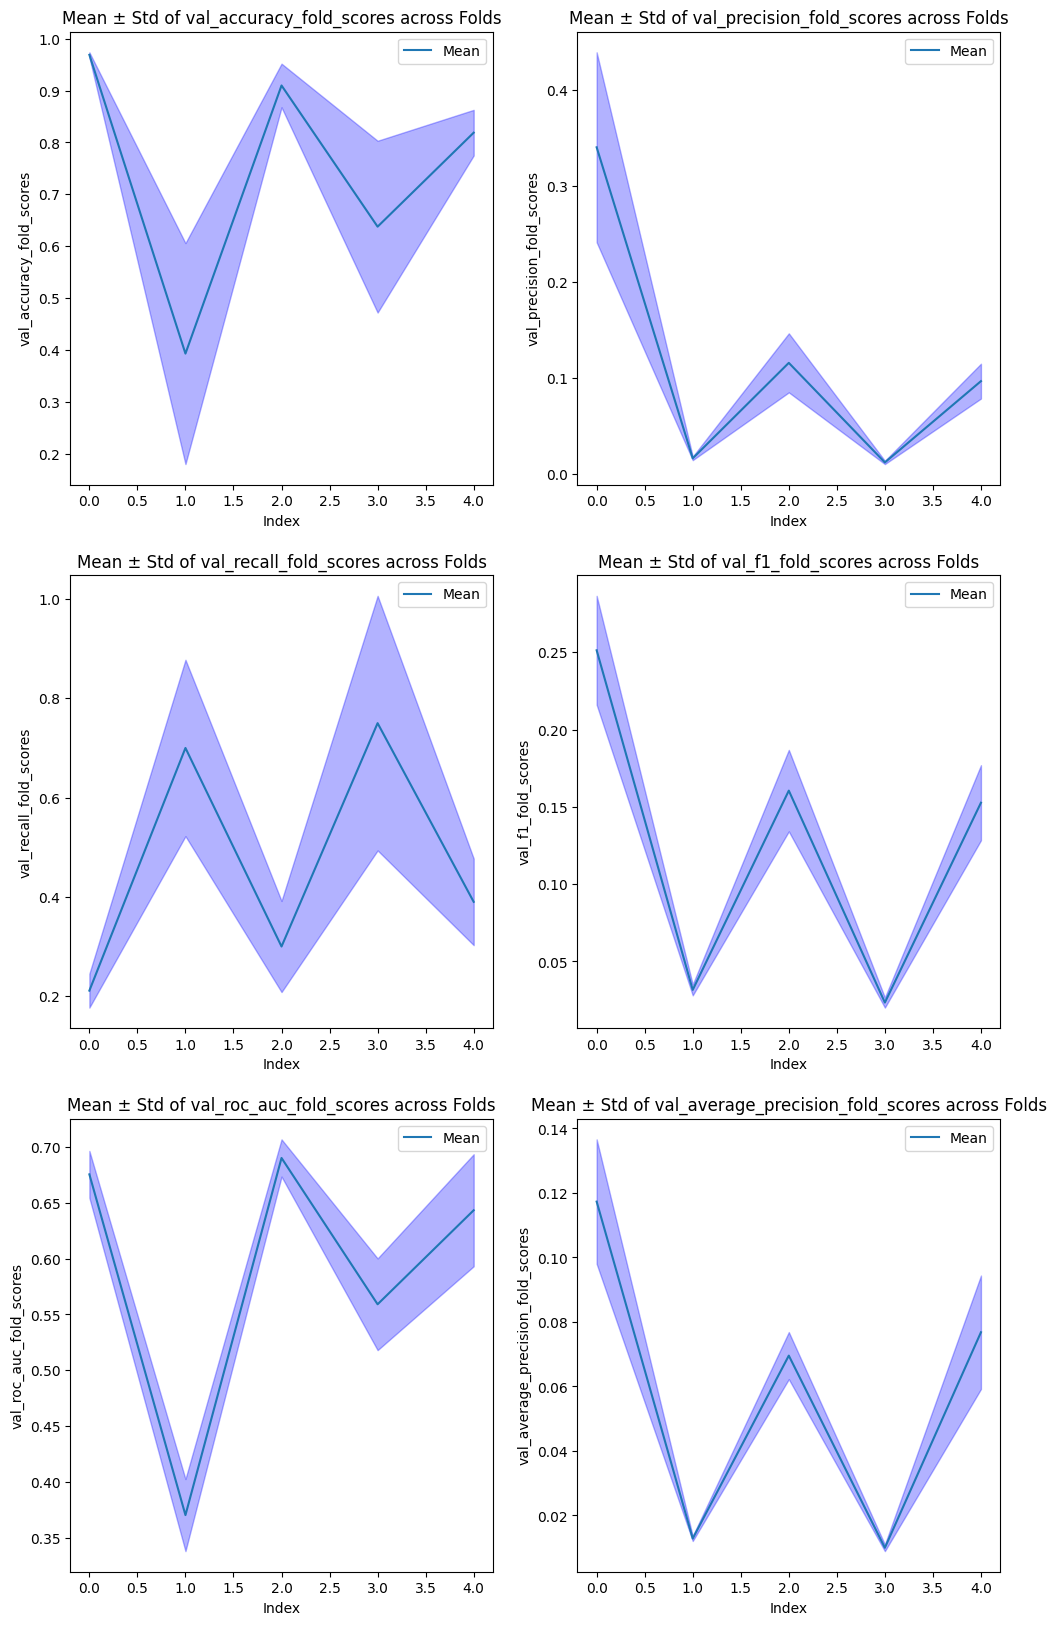

In [37]:
fig, ax = plt.subplots(3, 2, figsize=(12, 20))

for i, (metric, df) in enumerate(by_metrics.items()):
    line_plot_metric(df, metric, ax[(i//2, i%2)])

In [38]:
import yaml
with open(project_root / 'features.yaml') as f:
    feature_sets = yaml.safe_load(f)

if 'core_price_features' in feature_sets.keys():    
    feature_sets.pop('core_price_features')

In [44]:
feature_sets.keys()

dict_keys(['price_stats', 'VIX_features', 'VIX_over_vol_features'])

In [46]:
def parse_json_file_name(filename, features):
    import os

    top_keys = list(features.keys())
    basename = os.path.basename(filename).replace("_report.json", "")

    top_level = None
    sub_level = None


    top_keys.sort(key=len, reverse=True) # to not have key collisions
    for key in top_keys:
        if basename.startswith(key + "_"):
            top_level = key
            sub_level = basename[len(key) + 1:]  # rest of the string after the top-level key + underscore
            break

    if top_level is None:
        raise ValueError(f"Could not parse top-level key from {basename}")

    return features[top_level][sub_level]

In [54]:
feat_cols = parse_json_file_name('price_stats_5-10_vol_of_vol_report.json', feature_sets)

In [51]:
data_df = pd.read_csv(project_root / "data/processed/^GSPC_processed.csv")

In [56]:
features_df = data_df[feat_cols]

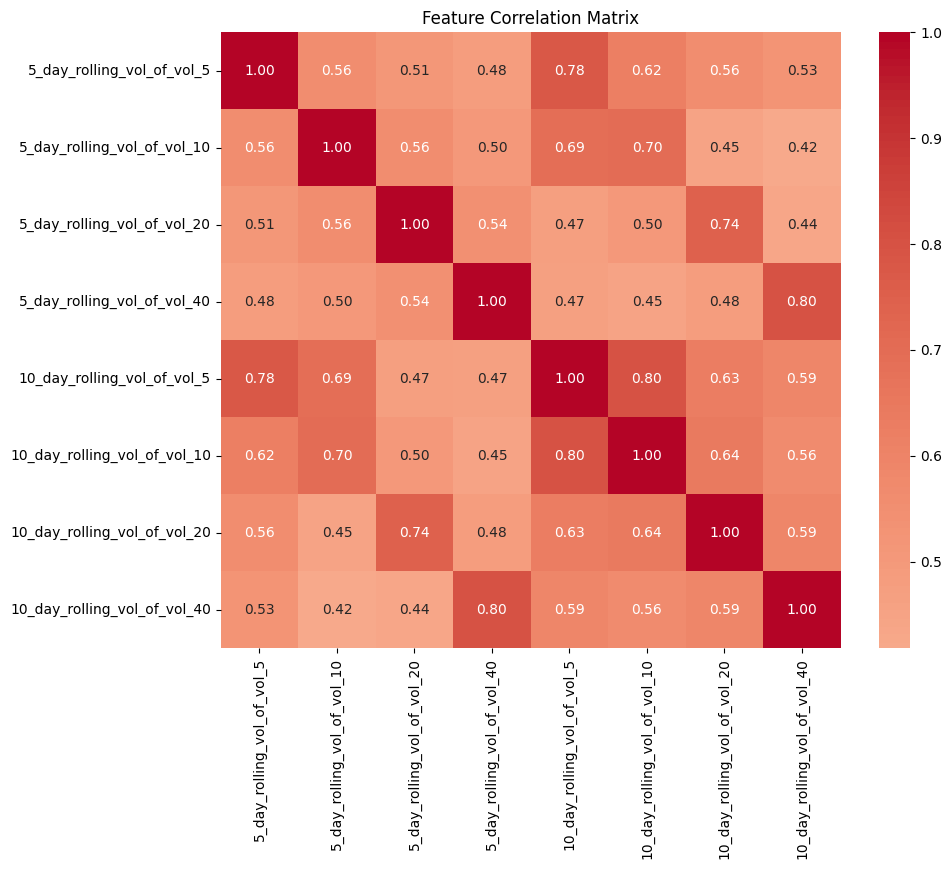

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = features_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0) # center 0 helps with not making it seem better than it is
plt.title("Feature Correlation Matrix")
plt.show()